## Module 6 - Python Api Challenge

### Introduction

In this Challenge, I used many skills I learned during the Data Analysis Bootcamp. The Challenge is in two parts. The first part is called WeatherPy. In WeatherPy, I have used the 'citipy' library to generate latitude/longitude points randomly all over the earth and locale cities close to these points, retrieve current weather data from most of these cities where OpenWeatherMap.org has recorded weather information, and then plot scatter plots between Latitude and Temperature, Humidity, Cloudiness, and Wind Speed. To complete the Challenge, I discuss the findings from the scatter plots of the relationships between Latitude and the other variables for the Northern and Southern Hemispheres. 

The second part is called VacationPy. In VacationPy, I have used the hvplot.pandas plotting library to plot all the cities on a world map. After that, I began searching for a list of cities experiencing excellent weather that would suit a summer holiday. I copied my new dataframe, 'city_data_vac_df', from 'city_data_time_df' restricting 'Max Temp to between 22 and 30, Wind Speed to less than 4.5 m/s and cloudiness less than 5%. I found 13 cities that met my requirements. I used the Geoapify API to find a hotel less than 10 km from the city centre for each city. I printed a map of the cities and added the hotel's name and country to hover information.

### Data Preparation Procedure

I selected and loaded the libraries to perform all the calculations and plots. After that, I used the 'citipy' library functions to generate random geographic coordinates that could be located anywhere on Earth. and then locate the nearest city to these points. The code generated 

After generating a list of about 600 cities, we retrieved the weather date specified in the instructions for each city using "OpenWeatherMap.org API. Note that this site has several different products. In this Challenge retreived current weather data from Current Weather Data. Note that three different Temperature Values are available: Current Temperature, Min Temperature and Max Temperature. We obtained the Max Temp. This refers to the maximum temperature at the time of posting in the city and suburbs at the time of posting. It does not refer to each city's Maximum Temperature during the last 24 hours. The date refers to the Unix DateTime Stamp and the time of retrieving the data.

After retrieving the data, I noted that city names were all lowercase. I capitalised these values using the title() function. I also noticed the value in the date field in the retrieved data was the UNIX DateTime stamp. I searched the Python code to convert that into the current date and time. I created a new data frame from 'city_data_df' called 'city_data_time_df', converted the UNIX data time stamp to the normal date and time formats, and saved those in two columns. I use the date to label my scatter plots and maps in WeatherPy and VacationPy. This date will update with each API data retrieval when I run the code.

I wrote both city_data_df to cities.csv and city_data_time_df to citiestime.csv. I then read cities.csv to confirm the first writing. 

### Scatter Plots

I calculated the maximum and minimum Latitudes, maximum and minimum Max Temp, maximum and Minimum Humidity, maximum and minimum Cloudiness and maximum and minimum Wind Speeds to plot the x-axis and y-axis in each case. the scatter plots and regression plots. When the data were prepared, I plotted scatter plots of all data points (Northern and Southern Hemisphere) for City Latitude vs max temp, City Latitude vs. humidity, City Latitude vs. cloudiness, and City Latitude vs. wind Speed. I included the data retrieval date in the scatter plot title.

Computing Linear Regression for each relationship for the Northern and Southern Hemispheres.

I defined a function 'create_linear_regression_plot() for each of the eight relationships. I created Linear Regression Plots, Regression Equations and R**2 values for each of the following plots

Northern Hemisphere - Latitude Vs max temp, Latitude Vs humidity, Latitude Vs cloudiness, and Latitude Vs wind speed.  

Southern Hemisphere - Latitude Vs max temp, Latitude Vs humidity, Latitude Vs cloudiness, and Latitude Vs wind speed.

Each scatter plot includes a copy of the regression equation and R**2 value. I have also briefly discussed the regression equation for each relationship.

### Summary

I have summarised my findings about the relationships between Temperature, Humidity, Cloudiness, Wind Speed and Latitude in the Northern and Southern Hemispheres with their scatter plots and Linear Regression calculations.

It is important to consider when the data are collected. These data are from OpenWeatherMap.org  and were collected in one retrieval. As such the data are collected at the same time UTC, which are different local times. Thus some data are from day time readings in the middle of summer to others a night in the middle of winter, and at all times in-between.


### References

Open Weather Maps - API Documentation - https://openweathermap.org
    
API documentation and Playground for Geoapify maps and Code samples - https://apidocs.geoapify.com
    
How to Use REST APIs - A Complete Beginners's Guide - https://www.freecodecamp.org/news/how-to-use-rest-api/

API testing tutorial for beginners (updated - Youtube - freeCodeCamp.org.
                                    
Python API Development Fundamentals - Jack Chan, Ray Chung, Jack Huang.
                                    
Chat GPT


In [ ]:
## Part 1 - WeatherPy

### Load and Set Up Dependcies

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json as json
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generating Random Geographic Coordinates and a List of Cities Using Citipy Library

In [34]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 641


### Retrieve Weather Data and Create Plots to Emamine the Relationship Between Weather Variables and Latitude

#### Retrieve Weather Data For These Cities Using OpenWeatherMap API, and Process Data

In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print(query_url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data


for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (query_url + city)

    #print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    try:
        # Run an API request for each of the cities
        city_weather = requests.get(city_url).json()
            
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
                
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_data.append({
            "City": city, 
            "Lat": city_weather['coord']['lat'], 
            "Lng": city_weather['coord']['lon'], 
            "Max Temp": city_weather['main']['temp_max'],
            "Humidity": city_weather['main']['humidity'],
            "Cloudiness": city_weather['clouds']['all'],
            "Wind Speed": city_weather['wind']['speed'],
            "Country": city_weather['sys']['country'],
            "Date": city_weather['dt']
        })
        # If an error is experienced, skip the city

    except KeyError:
        print(f"Data not available for {city}")
    except requests.exceptions.RequestException as e:
        print(f"Request error for {city}: {e}")

   
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?appid=388d164c085ad1e938d1955d67396950&units=metric&q=
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | berdigestyakh
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | tura
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | feijo
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | st. john's
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | egilsstadir
Processing Record 11 of Set 1 | kuytun
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | monterey
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | wewak
Processing Record 19 of Set 1 | usogorsk
Processing Record 20 of Set 1 | qaqortoq
Processing Recor

Processing Record 39 of Set 4 | alotau
Data not available for alotau
Processing Record 40 of Set 4 | mogocha
Processing Record 41 of Set 4 | hasaki
Processing Record 42 of Set 4 | isafjordur
Processing Record 43 of Set 4 | lazaro cardenas
Processing Record 44 of Set 4 | howard springs
Processing Record 45 of Set 4 | holualoa
Processing Record 46 of Set 4 | mbandaka
Processing Record 47 of Set 4 | menongue
Processing Record 48 of Set 4 | ahau
Data not available for ahau
Processing Record 49 of Set 4 | verkhniye sergi
Processing Record 0 of Set 5 | freetown
Processing Record 1 of Set 5 | pahrump
Processing Record 2 of Set 5 | fale old settlement
Processing Record 3 of Set 5 | pottsville
Processing Record 4 of Set 5 | usinsk
Processing Record 5 of Set 5 | ytyk-kyuyel'
Data not available for ytyk-kyuyel'
Processing Record 6 of Set 5 | twon-brass
Processing Record 7 of Set 5 | kerikeri
Processing Record 8 of Set 5 | tsengel
Processing Record 9 of Set 5 | puerto carreno
Processing Record 10 

Processing Record 25 of Set 8 | emerald
Processing Record 26 of Set 8 | mbanza-ngungu
Processing Record 27 of Set 8 | saint-pierre-d'oleron
Data not available for saint-pierre-d'oleron
Processing Record 28 of Set 8 | bor
Processing Record 29 of Set 8 | seogwipo
Data not available for seogwipo
Processing Record 30 of Set 8 | zavodoukovsk
Processing Record 31 of Set 8 | fauske
Processing Record 32 of Set 8 | saint-louis
Processing Record 33 of Set 8 | brezina
Processing Record 34 of Set 8 | poronaysk
Processing Record 35 of Set 8 | fecamp
Processing Record 36 of Set 8 | temerluh
Processing Record 37 of Set 8 | ponta delgada
Processing Record 38 of Set 8 | moramanga
Processing Record 39 of Set 8 | fuvahmulah
Data not available for fuvahmulah
Processing Record 40 of Set 8 | fort bragg
Processing Record 41 of Set 8 | grand-lahou
Processing Record 42 of Set 8 | shuangjiang
Processing Record 43 of Set 8 | kruisfontein
Processing Record 44 of Set 8 | tabou
Processing Record 45 of Set 8 | ust'-

Data not available for geroskipou
Processing Record 4 of Set 12 | tumayr
Processing Record 5 of Set 12 | mount gambier
Processing Record 6 of Set 12 | khanty-mansiysk
Processing Record 7 of Set 12 | mount pearl
Processing Record 8 of Set 12 | suva
Processing Record 9 of Set 12 | kez
Processing Record 10 of Set 12 | paita
Processing Record 11 of Set 12 | celestun
Processing Record 12 of Set 12 | tucurui
Processing Record 13 of Set 12 | tual
Processing Record 14 of Set 12 | amasra
Processing Record 15 of Set 12 | al burayqah
Processing Record 16 of Set 12 | kirakira
Processing Record 17 of Set 12 | opuwo
Processing Record 18 of Set 12 | kununurra
Processing Record 19 of Set 12 | globe
Data not available for globe
Processing Record 20 of Set 12 | mugia
Processing Record 21 of Set 12 | bagan
Processing Record 22 of Set 12 | kaoma
Processing Record 23 of Set 12 | vanimo
Processing Record 24 of Set 12 | ndende
Processing Record 25 of Set 12 | stornoway
Processing Record 26 of Set 12 | ourila

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count|
city_data_df.count()


City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

#### Capitalising the Names of Cities using the title() function

In [ ]:
# Change City string into title format.

city_data_df['City'] = city_data_df['City'].str.title()

#### Converting the Unix "datetime" Stamp to Date and Time

In [37]:
# Change the "Date" from the Unix timestamp to date and time.

city_data_time_df = city_data_df.copy()

# Convert Unix timestamp to datetime
city_data_time_df['DateTime'] = pd.to_datetime(city_data_time_df['Date'], unit='s')

# Create 'Time' column
city_data_time_df['Time'] = city_data_time_df['DateTime'].dt.time

# Overwrite 'Date' column with just the date part
city_data_time_df['Date'] = city_data_time_df['DateTime'].dt.date

# Optionally, you can drop the 'DateTime' column if it's no longer needed
city_data_time_df.drop('DateTime', axis=1, inplace=True)



#### Display the city_data_time_df, show Data and Time of Data Collection

In [38]:
# Display sample data
city_data_time_df.head(5)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Time
0,Berdigestyakh,62.0989,126.6992,-24.72,97,100,2.32,RU,2024-01-01,02:49:36
1,Tiksi,71.6872,128.8694,-29.57,99,100,1.01,RU,2024-01-01,02:49:37
2,Waitangi,-43.9535,-176.5597,16.01,84,100,2.24,NZ,2024-01-01,02:49:37
3,Tura,25.5198,90.2201,20.29,51,0,0.55,IN,2024-01-01,02:49:38
4,Bilibino,68.0546,166.4372,-30.68,87,88,2.26,RU,2024-01-01,02:49:38


### Write and Read the csv Cities file.

#### Write "city_data_df" to "cities.csv"  and "city_data_time_df" to "citiestime.csv"

In [39]:
# Export the City_Data into a csvcity_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

city_data_time_df.to_csv("output_data/citiestime.csv", index_label="City_ID") 

#### Write "city_data_df" to "cities.csv", and display 5 Rows to Ensure File Read Correctly.

In [40]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Berdigestyakh,62.0989,126.6992,-24.72,97,100,2.32,RU,1704077376
1,Tiksi,71.6872,128.8694,-29.57,99,100,1.01,RU,1704077377
2,Waitangi,-43.9535,-176.5597,16.01,84,100,2.24,NZ,1704077377
3,Tura,25.5198,90.2201,20.29,51,0,0.55,IN,1704077378
4,Bilibino,68.0546,166.4372,-30.68,87,88,2.26,RU,1704077378


### Calculating the maximum and minimum values to use is Scatter Plots.

### Generating Scatter Plots Requested

#### Calculating the Maximums and Minimums of the Relevent Values to Use in the Scatter Plots

In [41]:
# Calculating maximum and minimum values to caculate ranges for scatter plots.

# Maximum Latitude
max_latitude = city_data_df['Lat'].max()

# Minimum Latitude
min_latitude = city_data_df['Lat'].min()

# Maximum Temperature
max_temperature = city_data_df['Max Temp'].max()

# Minimum Temperature
min_temperature = city_data_df['Max Temp'].min()

# Maximum Humidity
max_humidity = city_data_df['Humidity'].max()

# Minimum Humidity
min_humidity = city_data_df['Humidity'].min()

# Maximum Cloudiness
max_cloudiness = city_data_df['Cloudiness'].max()

# Minimum Cloudiness
min_cloudiness = city_data_df['Cloudiness'].min()

# Maximum Wind Speed
max_windspeed = city_data_df['Wind Speed'].max()

# Minimum Wind Speed
min_windspeed = city_data_df['Wind Speed'].min()

# Printing the results
print(f"Maximum Latitude: {max_latitude}")
print(f"Minimum Latitude: {min_latitude}")
print(f"Maximum Temperature: {max_temperature}")
print(f"Minimum Temperature: {min_temperature}")
print(f"Maximum Humidity: {max_humidity}")
print(f"Minimum Humidity: {min_humidity}")
print(f"Maximum Cloudiness: {max_cloudiness}")
print(f"Minimum Cloudiness: {min_cloudiness}")
print(f"Maximum Wind Speed: {max_windspeed}")
print(f"Minimum Wind Speed: {min_windspeed}")


Maximum Latitude: 78.2186
Minimum Latitude: -54.8
Maximum Temperature: 39.87
Minimum Temperature: -42.72
Maximum Humidity: 100
Minimum Humidity: 2
Maximum Cloudiness: 100
Minimum Cloudiness: 0
Maximum Wind Speed: 17.28
Minimum Wind Speed: 0.0


#### Latitude Vs Temperature

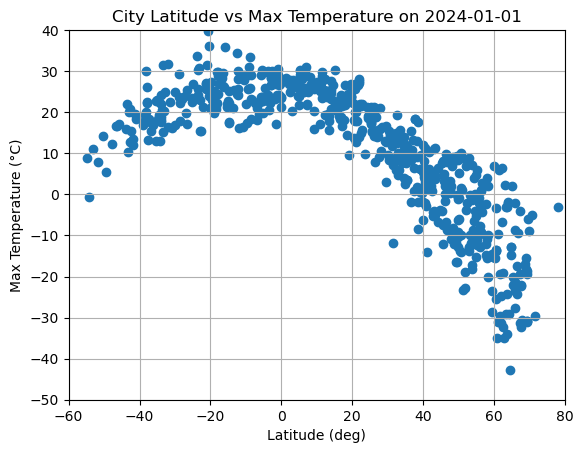

In [42]:
# Build scatter plot for latitude vs. temperature
Latitude = city_data_df['Lat']
Temperature = city_data_df['Max Temp']

# Creating the scatter plot
plt.scatter(Latitude, Temperature)

# specify figure size
#plt.figure(figsize=(10, 6))

# Incorporate the other graph properties
plt.xlim(-54.8, 78.2186)
plt.ylim(-47.22, 38.53)

# Setting the grid
plt.grid(True)
plt.xticks(np.arange(-60, 81, 20))  # Latitude ticks from -60 to 80 with an interval of 20
plt.yticks(np.arange(-50, 41, 10))  # Temperature ticks from -50 to 40 with an interval of 10

# Adding title and labels


pltfetch_date = city_data_time_df['Date'][0]

plt.title(f"City Latitude vs Max Temperature on {fetch_date}").xlabel('Latitude (deg)')
plt.ylabel('Max Temperature (°C)')
 
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs Humidity

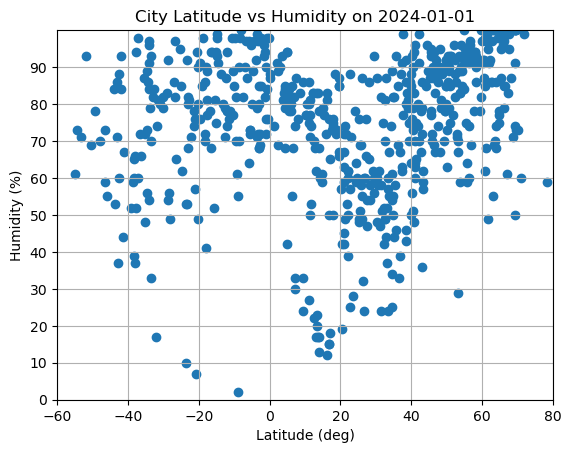

In [43]:
# Build scatter plot for latitude vs. humidity
Latitude = city_data_df['Lat']
Humidity = city_data_df['Humidity']

# Creating the scatter plot
plt.scatter(Latitude, Humidity)

# specify figure size
#plt.figure(figsize=(10, 6))

# Incorporate the other graph properties
plt.xlim(-54.8, 78.2186)
plt.ylim(8, 100)

# Setting the grid
plt.grid(True)
plt.xticks(np.arange(-60, 81, 20))  # Latitude ticks from -60 to 80 with an interval of 20
plt.yticks(np.arange(0, 100, 10))  # Humidity ticks from 0 to 100 with an interval of 10

# Adding title and labels

fetch_date = city_data_time_df['Date'][0]

plt.title(f"City Latitude vs Humidity on {fetch_date}")
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs Cloudiness

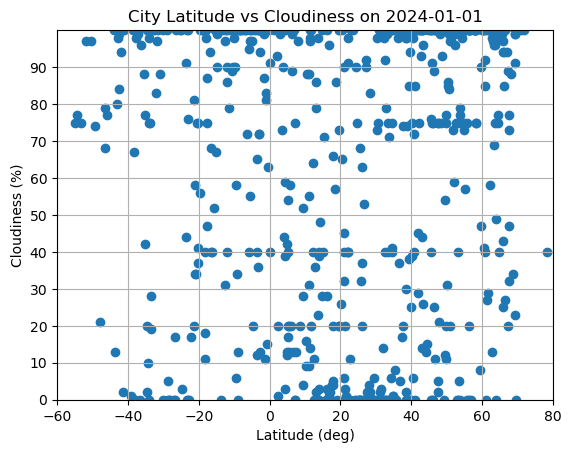

In [44]:
# Build scatter plot for latitude vs. Cloudiness
Latitude = city_data_df['Lat']
Cloudiness = city_data_df['Cloudiness']

# Creating the scatter plot
plt.scatter(Latitude, Cloudiness)

# specify figure size
#plt.figure(figsize=(10, 6))

# Incorporate the other graph properties
plt.xlim(-54.8, 78.2186)
plt.ylim(0, 100)

# Setting the grid
plt.grid(True)
plt.xticks(np.arange(-60, 81, 20))  # Latitude ticks from -60 to 80 with an interval of 20
plt.yticks(np.arange(0, 100, 10))  # Cloudiness ticks from 0 to 100 with an interval of 10

# Adding title and labels

fetch_date = city_data_time_df['Date'][0]

plt.title(f"City Latitude vs Cloudiness on {fetch_date}")
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness (%)')

# save plot
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude Vs Wind Speed

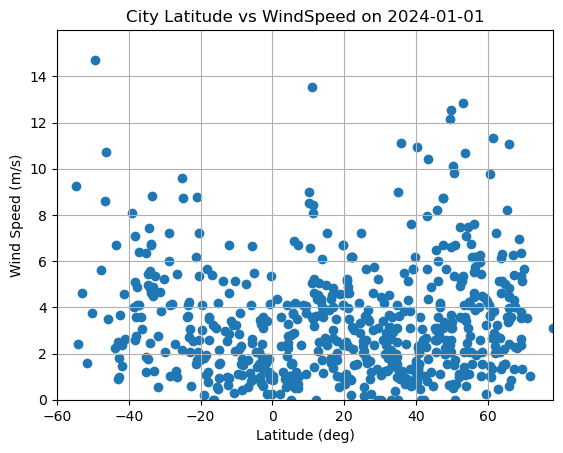

In [45]:
# Build scatter plot for latitude vs. wind speed
Latitude = city_data_df['Lat']
Wind_Speed = city_data_df['Wind Speed']

# Creating the scatter plot
plt.scatter(Latitude, Wind_Speed)



# Incorporate the other graph properties
plt.xlim(-54.8, 78.2186)
plt.ylim(0, 16)

# Setting the grid
plt.grid(True)
plt.xticks(np.arange(-60, 80, 20))  # Latitude ticks from -60 to 80 with an interval of 20
plt.yticks(np.arange(0, 16, 2))  # windspeed ticks from 0 to 16 with an interval of 2

# Adding title and labels

fetch_date = city_data_time_df['Date'][0]

plt.title(f"City Latitude vs WindSpeed on {fetch_date}")
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

### Computing the Linear Regression for Each Relationship for the Northern and Southern Hemispheres.

#### Create Function to Linear Regression Plot

In [46]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_data, y_data, title, x_label, y_label, 
                                  annotation_position, annotation_rotation, 
                                  vert_alignment, horiz_alignment):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

    # Get regression line values
    reg_values = x_data * slope + intercept

    # Create a new figure
    plt.figure(figsize=(8, 6))

    # Scatter plot
    plt.scatter(x_data, y_data)

    # Regression line plot
    plt.plot(x_data, reg_values, "r-")

    # Labeling the regression line
    label = f"y = {slope:.2f}x + {intercept:.2f}\nR\u00b2 = {r_value**2:.2f}"
    plt.annotate(label, xy=annotation_position, xycoords='axes fraction', 
                 fontsize=20, color="red", rotation=annotation_rotation,
                 verticalalignment=vert_alignment, horizontalalignment=horiz_alignment)

    # Setting title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show the plot
    plt.show()


#### Create Data Frame with Northern Hemisphere Data

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Berdigestyakh,62.0989,126.6992,-24.72,97,100,2.32,RU,1704077376
1,Tiksi,71.6872,128.8694,-29.57,99,100,1.01,RU,1704077377
3,Tura,25.5198,90.2201,20.29,51,0,0.55,IN,1704077378
4,Bilibino,68.0546,166.4372,-30.68,87,88,2.26,RU,1704077378
7,St. John'S,47.5649,-52.7093,1.20,90,75,8.75,CA,1704077246


#### Create Data Frame with Southern Hemisphere Data

In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Waitangi,-43.9535,-176.5597,16.01,84,100,2.24,NZ,1704077377
5,Feijo,-8.1642,-70.3536,23.08,100,100,1.50,BR,1704077378
6,Dunedin,-45.8742,170.5036,17.22,55,77,3.51,NZ,1704077379
8,Adamstown,-25.0660,-130.1015,22.54,85,100,9.61,PN,1704077379
12,Blackmans Bay,-43.0167,147.3167,20.07,71,100,0.89,AU,1704077381


###  Temperature vs. Latitude Linear Regression Plot

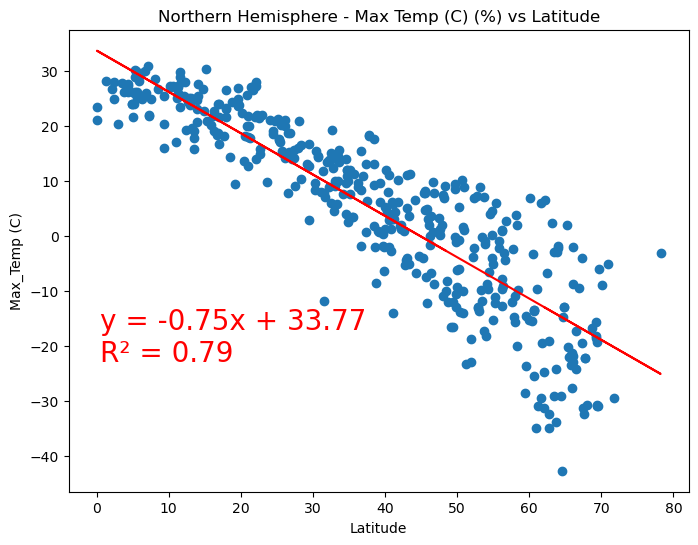

In [49]:
# Linear regression on Northern Hemisphere

create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],
                              'Northern Hemisphere - Max Temp (C) (%) vs Latitude',
                              'Latitude', 'Max_Temp (C)',
                              annotation_position=(0.05, 0.40), annotation_rotation=0,
                              vert_alignment='top', horiz_alignment='left')



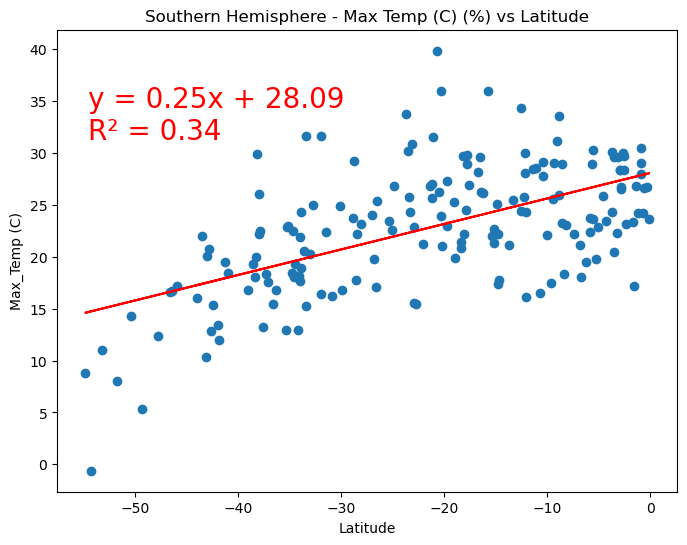

In [50]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                              'Southern Hemisphere - Max Temp (C) (%) vs Latitude',
                              'Latitude', 'Max_Temp (C)',
                              annotation_position=(0.05, 0.88), annotation_rotation=0,
                              vert_alignment='top', horiz_alignment='left')

### Relationship between Max Temp and Latitude

Examining the relationships between Latitude and Max Temp in the northern hemisphere, we see a strong relationship between latitude and temperature, and the changes in latitude can explain 79% of the temperature changes. The relationship in the southern hemisphere is not as strong, with only 25% of the temperature can be explained by the changes in latitude. Possible reasons for the difference are the different seasons, with winter in the northern hemisphere and summer in the southern hemisphere, and the difference in water surface area between the two hemispheres.


### Humidity vs. Latitude Linear Regression Plot

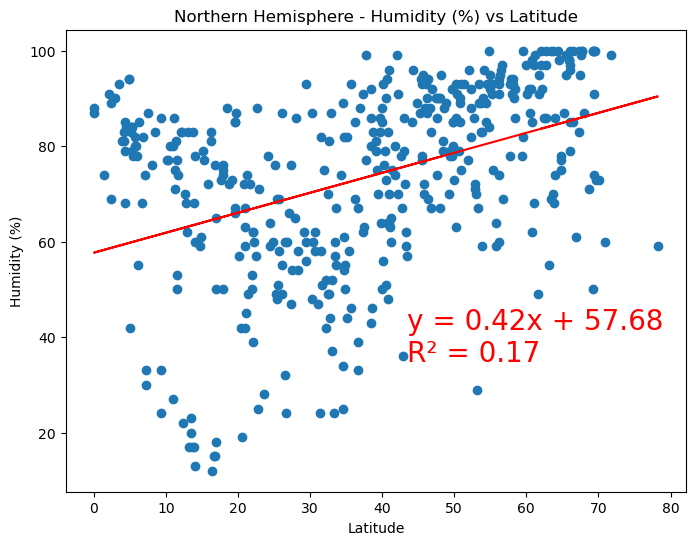

In [51]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                              'Northern Hemisphere - Humidity (%) vs Latitude',
                              'Latitude', 'Humidity (%)',
                              annotation_position=(0.55, 0.40), annotation_rotation=0,
                              vert_alignment='top', horiz_alignment='left')

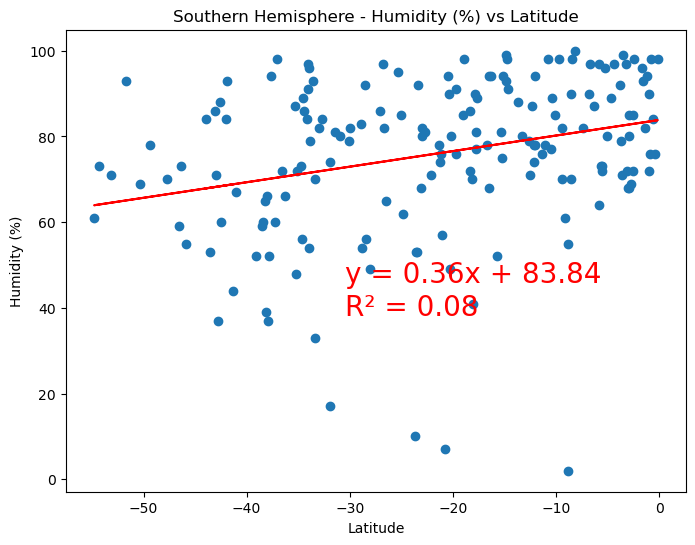

In [52]:
# Southern Hemisphere

create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
                              'Southern Hemisphere - Humidity (%) vs Latitude',
                              'Latitude', 'Humidity (%)',
                              annotation_position=(0.45, 0.50), annotation_rotation=0,
                              vert_alignment='top', horiz_alignment='left')

### Relationship between Humidity and Latitude

Examining the relationships between Latitude and Humidity in the northern hemisphere, we see a weak relationship between them. Changes in latitude can only account for 17% of the changes in humidity, with humidity increasing with latitude in the southern hemisphere. Changes in latitude can only account for 8% of the changes in humidity. In addition to that, we see humidity decreasing away from the equator. This suggests that factors other than latitude affect humidity.    


### Cloudiness vs. Latitude Linear Regression Plot

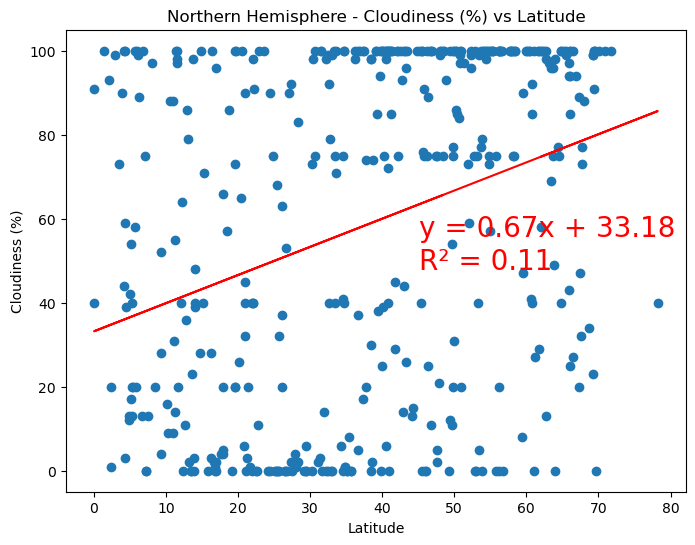

In [53]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                              'Northern Hemisphere - Cloudiness (%) vs Latitude',
                              'Latitude', 'Cloudiness (%)',
                              annotation_position=(0.57, 0.60), annotation_rotation=0,
                              vert_alignment='top', horiz_alignment='left')

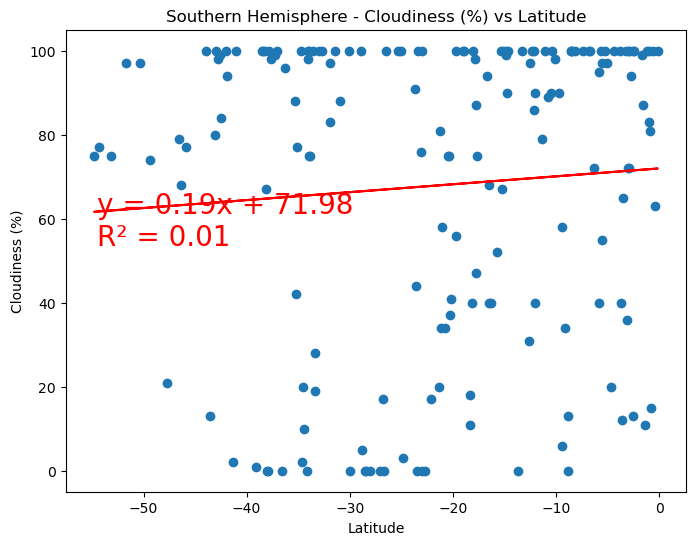

In [54]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                              'Southern Hemisphere - Cloudiness (%) vs Latitude',
                              'Latitude', 'Cloudiness (%)',
                              annotation_position=(0.05, 0.65), annotation_rotation=0,
                              vert_alignment='top', horiz_alignment='left')

### Relationship between Cloudiness and Latitude

Examining the relationships between Latitude and Cloudiness in the northern hemisphere, we see a weak relationship between them. Changes in latitude can only account for 11% of the changes in cloudiness, increasing with latitude. In the southern hemisphere. Changes in latitude can only account for 1% of the changes in cloudiness. In addition to that, we see cloudiness decreasing slightly away from the equator. This suggests that factors other than latitude affect cloudiness. While the regression line shows a reasonably strong correlation in the northern hemisphere, the data points are spread out with a heavier weighting of 0% cloudiness towards the equator and 100% cloudiness towards the north pole. In the southern hemisphere, the regression line shows a very weak correlation.


### Wind Speed vs. Latitude Linear Regression Plot

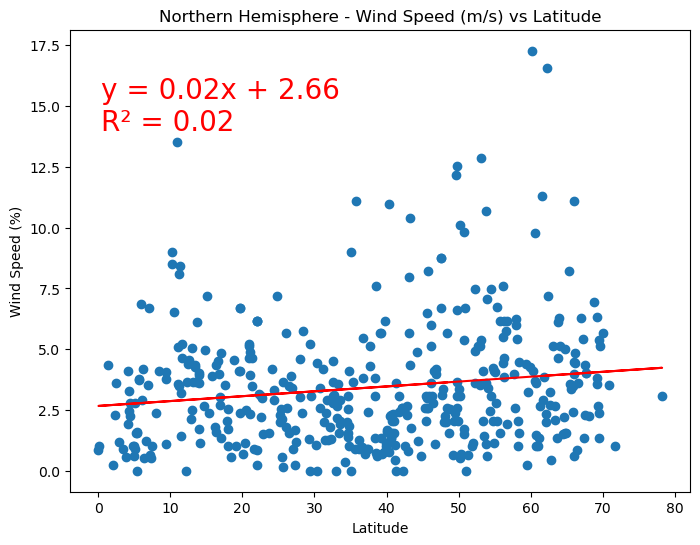

In [55]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                              'Northern Hemisphere - Wind Speed (m/s) vs Latitude',
                              'Latitude', 'Wind Speed (%)',
                              annotation_position=(0.05, 0.90), annotation_rotation=0,
                              vert_alignment='top', horiz_alignment='left')

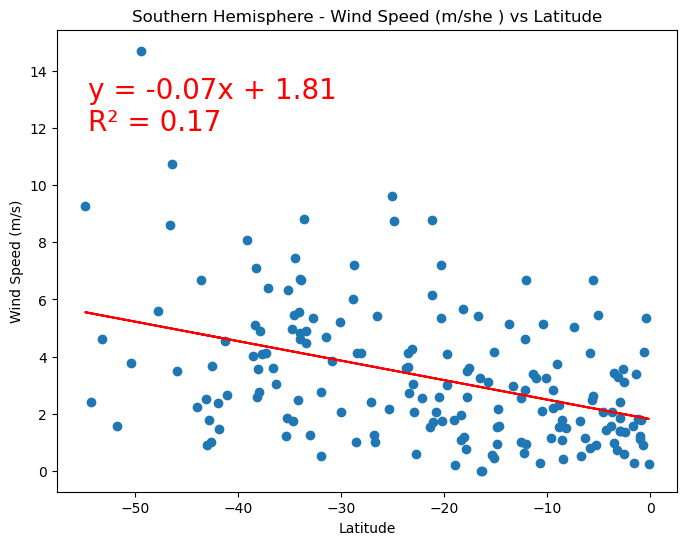

In [56]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                              'Southern Hemisphere - Wind Speed (m/she ) vs Latitude',
                              'Latitude', 'Wind Speed (m/s)',
                              annotation_position=(0.05, 0.90), annotation_rotation=0,
                              vert_alignment='top', horiz_alignment='left')
                              

### Relationship between Wind Speed and Latitude

Examining the relationships between Latitude and Wind Speed in the northern hemisphere, we see a weak relationship between them. Changes in latitude can only account for 2% of the changes in wind speed, with wind speed increasing with latitude. In the southern hemisphere, changes in latitude can only account for 17% of the changes in wind speed. In addition to that, we see wind speed increasing away from the equator. This suggests that factors other than latitude affect wind speed. 
